In [32]:
!pip install quantstats emd

In [1]:
import pandas as pd
import numpy as np

from mlfinlab.funtions.imos_transform import imos_transform
from mlfinlab.funtions.imfs import decompose_imfs
from mlfinlab.funtions.llt import llt_transform

In [2]:
import quantstats as qs

# extend pandas functionality with metrics, etc.
qs.extend_pandas()

# fetch the daily returns for a stock
stock = qs.utils.download_returns('META')

[*********************100%%**********************]  1 of 1 completed


In [3]:
# stock.to_csv("test_data.csv")

In [4]:
s = (stock+1).fillna(1).cumprod()

<Axes: xlabel='Date'>

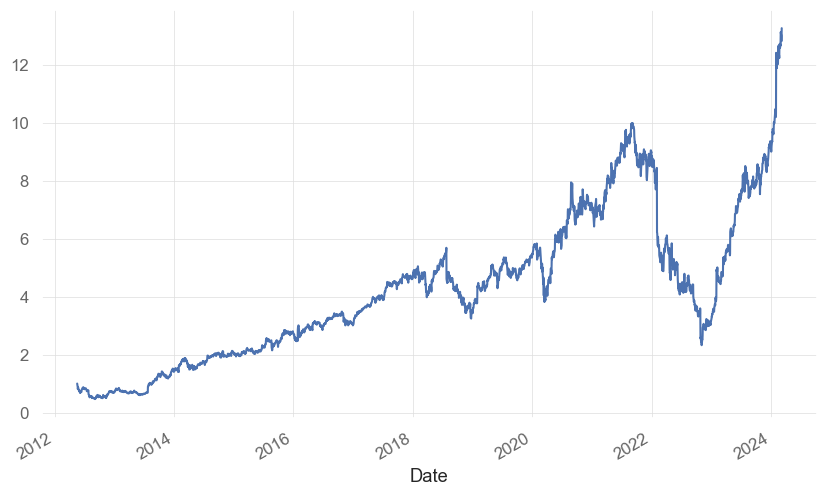

In [5]:
s.plot()

In [6]:
z, _ = imos_transform(s.pct_change())
z.dropna()

Date
2014-06-03    2.013946
2014-06-04    2.087551
2014-06-05    1.985581
2014-06-06    1.978985
2014-06-09    2.029557
                ...   
2024-03-01    2.254261
2024-03-04    2.248019
2024-03-05    2.213956
2024-03-06    2.194759
2024-03-07    2.269237
Name: Close, Length: 2458, dtype: float64

In [7]:
z, _ = imos_transform(stock)
z.dropna()

Date
2014-06-03    2.013946
2014-06-04    2.087551
2014-06-05    1.985581
2014-06-06    1.978985
2014-06-09    2.029557
                ...   
2024-03-01    2.254261
2024-03-04    2.248019
2024-03-05    2.213956
2024-03-06    2.194759
2024-03-07    2.269237
Name: Close, Length: 2458, dtype: float64

In [8]:
imfs = decompose_imfs(z.dropna(), max_imf=-1)
d = pd.DataFrame(np.diff(imfs.values, axis=0), columns=imfs.columns, index=imfs.index[1:])

In [9]:
d

,Close_0,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6
Date,,,,,,,
2014-06-04,0.076689,-0.014612,0.006034,0.003097,0.002488,-0.000593,0.000502
2014-06-05,-0.114307,-0.002518,0.008759,0.003880,0.002315,-0.000602,0.000502
2014-06-06,-0.028427,0.005454,0.009905,0.004440,0.002140,-0.000611,0.000503
2014-06-09,0.026829,0.007767,0.009354,0.004775,0.001963,-0.000619,0.000503
2014-06-10,0.097577,0.006262,0.007096,0.004887,0.001784,-0.000628,0.000503
...,...,...,...,...,...,...,...
2024-03-01,0.045568,-0.004408,0.016259,0.001829,-0.002820,0.000136,0.000145
2024-03-04,-0.011835,-0.004139,0.010449,0.001957,-0.002956,0.000136,0.000146
2024-03-05,-0.036017,-0.001903,0.004563,0.002103,-0.003091,0.000136,0.000146


In [10]:
d.Close_2

Date
2014-06-04    0.006034
2014-06-05    0.008759
2014-06-06    0.009905
2014-06-09    0.009354
2014-06-10    0.007096
                ...   
2024-03-01    0.016259
2024-03-04    0.010449
2024-03-05    0.004563
2024-03-06   -0.001189
2024-03-07   -0.006082
Name: Close_2, Length: 2457, dtype: float64

In [11]:
from sklearn.preprocessing import RobustScaler

/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


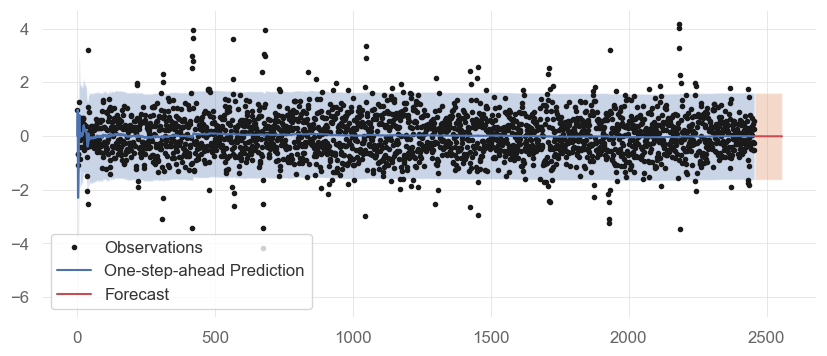

In [12]:
llt_transform(d.Close_0.cumsum(), scaler=RobustScaler).plot()

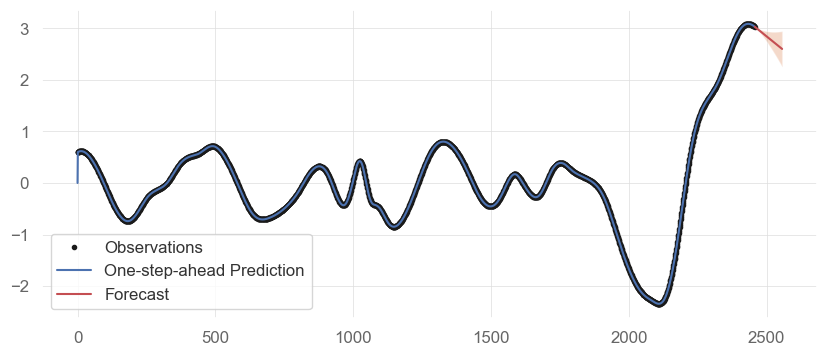

In [ ]:
llt_transform(d.Close_4.cumsum()).plot()

<Axes: xlabel='Date'>

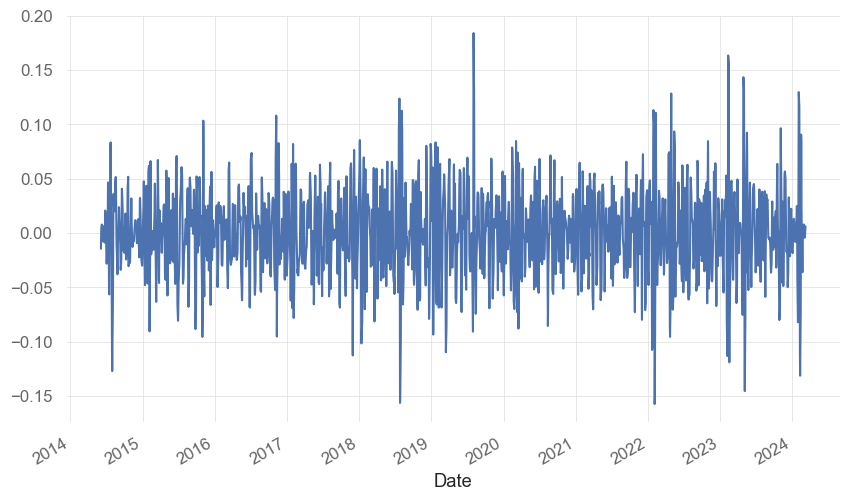

In [ ]:
d.Close_1.plot()

<Axes: xlabel='Date'>

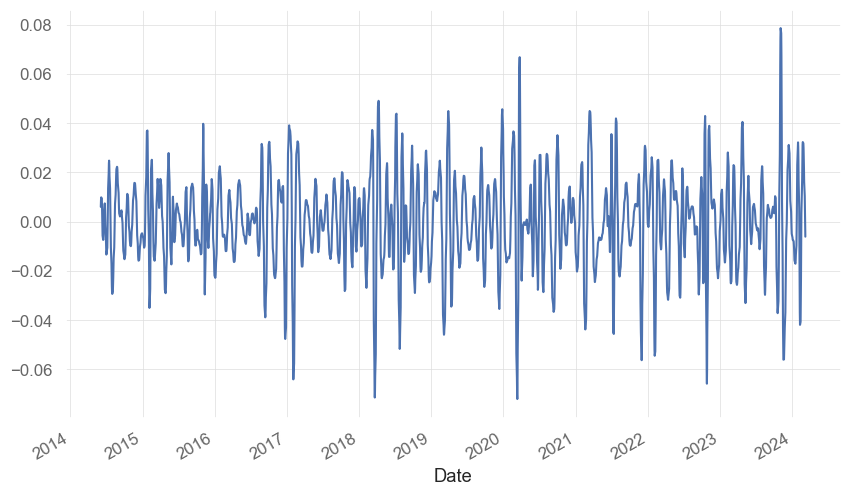

In [13]:
d.Close_2.plot()

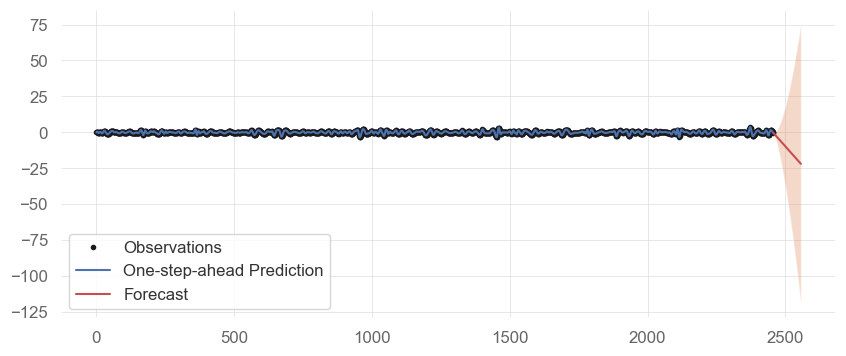

In [19]:
result = llt_transform(d.Close_2.cumsum(), scaler=RobustScaler)
result.plot()

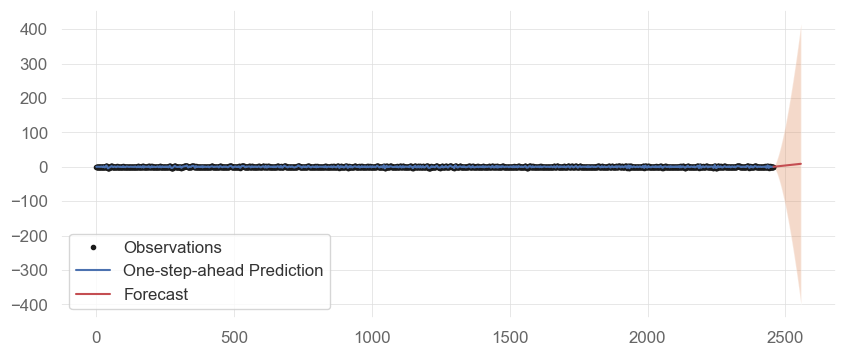

In [13]:
llt_transform(d.Close_1.cumsum()).plot()

<Axes: xlabel='Date'>

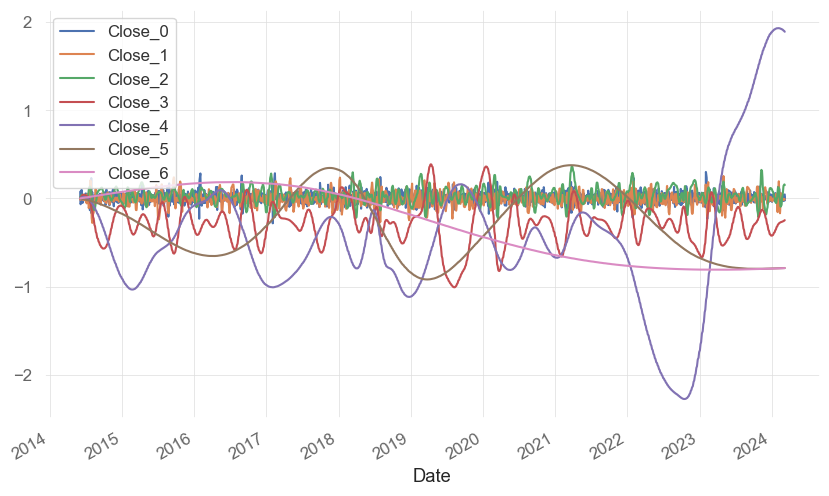

In [49]:
d.cumsum().plot()

## Volume Balance Bar

In [13]:
# import sys
# sys.modules.pop('mlfinlab.datastructures.balance')

In [14]:
import mlfinlab
from mlfinlab.datastructures.balance import get_volume_bars, get_dollar_bars

In [15]:
import pickle

with open("sample.pkl", "rb") as f:
    df = pickle.load(f)

In [16]:
df.reset_index(inplace=True)

In [17]:
# import pandas as pd
# df['Datetime'] = pd.to_datetime(df.Epoch).astype(int) / 10**9

In [18]:
df[["Epoch", "Open", "Volume"]].shape
df[["Epoch", "Open", "Volume"]].dtypes

Epoch     datetime64[ns, UTC]
Open                  float64
Volume                float64
dtype: object

In [36]:
volume_bars = get_volume_bars(df[["Epoch", "Open", "Volume"]], threshold=1e7)
volume_bars

Reading data in batches:
Batch number: 0
Returning bars 



,date_time,open,high,low,close,cum_vol,cum_dollar,cum_ticks
0,2023-09-10 16:49:00+00:00,1615.29,1615.45,1613.51,1613.51,2.324388e+07,3.750764e+10,13
1,2023-09-10 16:50:00+00:00,1613.51,1607.10,1607.10,1607.10,1.002602e+07,1.611281e+10,1
2,2023-09-10 16:59:00+00:00,1607.10,1611.51,1607.10,1611.31,1.006516e+07,1.619204e+10,9
3,2023-09-10 17:09:00+00:00,1611.31,1613.48,1607.08,1607.08,1.031105e+07,1.659552e+10,10
4,2023-09-10 17:26:00+00:00,1607.08,1608.29,1604.71,1606.58,1.047852e+07,1.682862e+10,17
...,...,...,...,...,...,...,...,...
9177,2024-01-30 16:07:00+00:00,2345.29,2348.66,2340.98,2346.76,1.356158e+07,3.181650e+10,6
9178,2024-01-30 16:15:00+00:00,2346.76,2349.57,2344.01,2346.69,1.094959e+07,2.569507e+10,8
9179,2024-01-30 16:22:00+00:00,2346.69,2348.70,2337.24,2348.70,1.314214e+07,3.080140e+10,7
9180,2024-01-30 16:26:00+00:00,2348.70,2358.99,2348.70,2358.48,1.127574e+07,2.657491e+10,4


<Axes: >

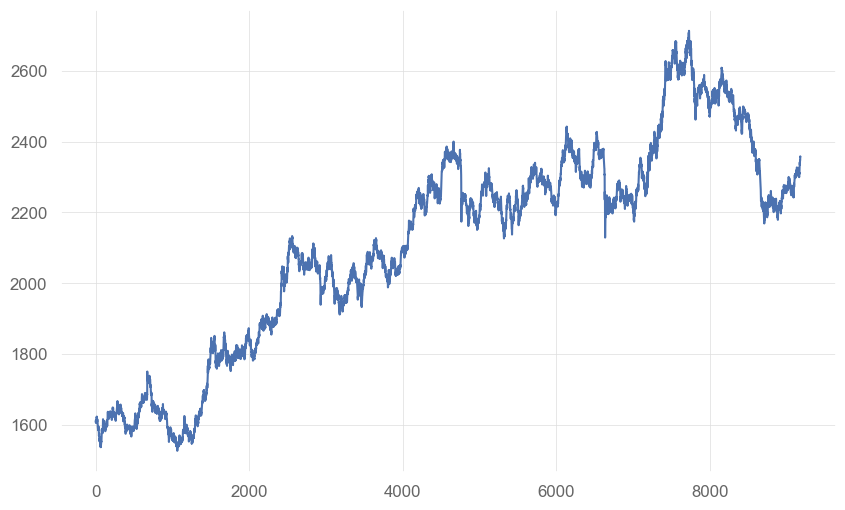

In [37]:
volume_bars.close.plot()

## Volume Imbalance Bar

In [20]:
# import sys
# sys.modules.pop('mlfinlab.datastructures.imbalance')

In [7]:
import mlfinlab
from mlfinlab.datastructures.imbalance import get_volume_imbalance_bars

In [8]:
import pickle

with open("sample.pkl", "rb") as f:
    df = pickle.load(f)

df.reset_index(inplace=True)


In [12]:
volume_imbalance_bars = get_volume_imbalance_bars(df[["Epoch", "Open", "Volume"]], exp_num_ticks_init=1000, num_prev_bars=10, num_ticks_ewma_window=100)
volume_imbalance_bars

Reading data in batches:
Batch number: 0
Returning bars 



,date_time,open,high,low,close,cum_vol,cum_dollar,cum_ticks
0,2023-09-11 09:16:00+00:00,1615.29,1627.74,1604.71,1607.24,2.753088e+08,4.441740e+11,1000
1,2023-09-11 16:21:00+00:00,1607.24,1607.62,1552.99,1560.70,3.604702e+08,5.691540e+11,425
2,2023-09-12 10:22:00+00:00,1560.70,1609.07,1532.77,1609.07,4.300703e+08,6.737820e+11,1081
3,2023-09-14 01:05:00+00:00,1609.07,1637.43,1581.89,1636.23,7.006297e+08,1.123293e+12,2323
4,2023-09-14 15:44:00+00:00,1636.23,1639.06,1613.15,1631.66,2.759332e+08,4.483489e+11,879
...,...,...,...,...,...,...,...,...
163618,2024-01-30 16:28:00+00:00,2356.97,2354.46,2354.46,2354.46,1.474603e+06,3.471894e+09,1
163619,2024-01-30 16:29:00+00:00,2354.46,2353.41,2353.41,2353.41,1.086716e+06,2.557489e+09,1
163620,2024-01-30 16:30:00+00:00,2353.41,2357.46,2353.41,2357.46,5.852298e+06,1.379656e+10,1
163621,2024-01-30 16:31:00+00:00,2357.46,2360.21,2357.46,2360.21,3.452980e+06,8.149757e+09,1


<Axes: >

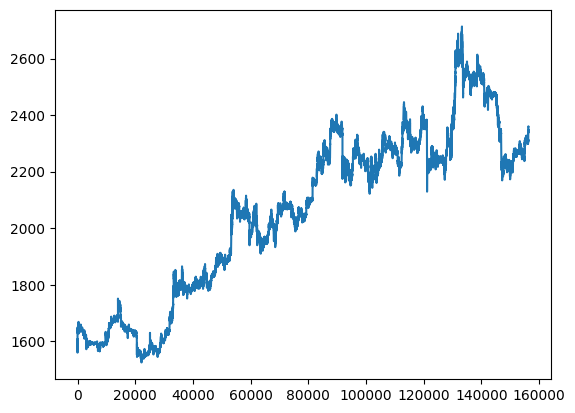

In [10]:
volume_imbalance_bars.close.plot()

## Dollar Imbalance Bar

In [1]:
import mlfinlab
from mlfinlab.datastructures.imbalance import get_dollar_imbalance_bars

In [2]:
import pickle

with open("sample.pkl", "rb") as f:
    df = pickle.load(f)

df.reset_index(inplace=True)


In [6]:
dollar_imbalance_bars = get_dollar_imbalance_bars(df[["Epoch", "Open", "Volume"]], exp_num_ticks_init=1000, num_prev_bars=3, num_ticks_ewma_window=3)
dollar_imbalance_bars

Reading data in batches:
Batch number: 0
Returning bars 



,date_time,open,high,low,close,cum_vol,cum_dollar,cum_ticks
0,2023-09-11 09:16:00+00:00,1615.29,1627.74,1604.71,1607.24,2.753088e+08,4.441740e+11,1000
1,2023-09-11 18:06:00+00:00,1607.24,1607.62,1552.55,1561.76,4.017022e+08,6.334243e+11,530
2,2023-09-12 10:21:00+00:00,1561.76,1594.17,1532.77,1593.29,3.694756e+08,5.783558e+11,975
3,2023-09-12 10:22:00+00:00,1593.29,1609.07,1593.29,1609.07,1.936270e+07,3.115593e+10,1
4,2023-09-13 05:20:00+00:00,1609.07,1617.29,1586.02,1587.81,3.309674e+08,5.302192e+11,1138
...,...,...,...,...,...,...,...,...
141198,2024-01-30 16:29:00+00:00,2356.97,2354.46,2353.41,2353.41,2.561319e+06,6.029382e+09,2
141199,2024-01-30 16:30:00+00:00,2353.41,2357.46,2353.41,2357.46,5.852298e+06,1.379656e+10,1
141200,2024-01-30 16:32:00+00:00,2357.46,2360.21,2357.46,2358.28,4.510168e+06,1.064290e+10,2
141201,2024-01-30 16:34:00+00:00,2358.28,2359.40,2358.28,2358.37,1.893049e+06,4.465727e+09,2


<Axes: >

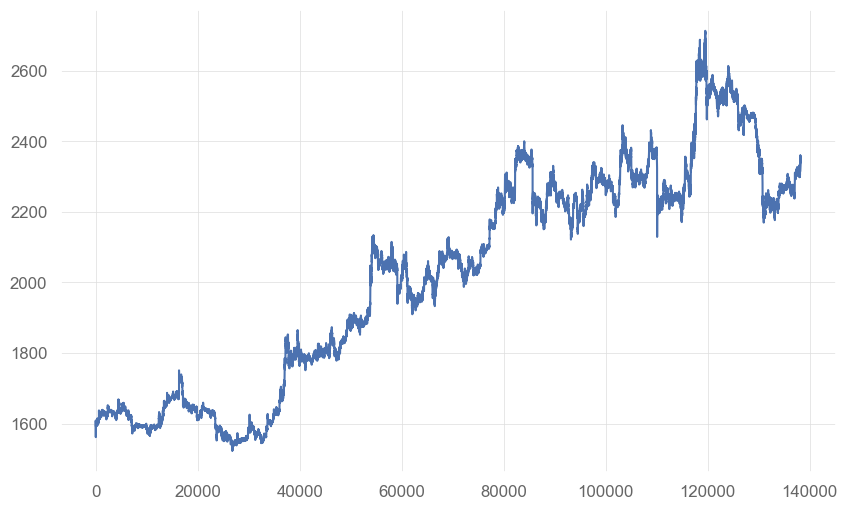

In [28]:
dollar_imbalance_bars.close.plot()

<Axes: >

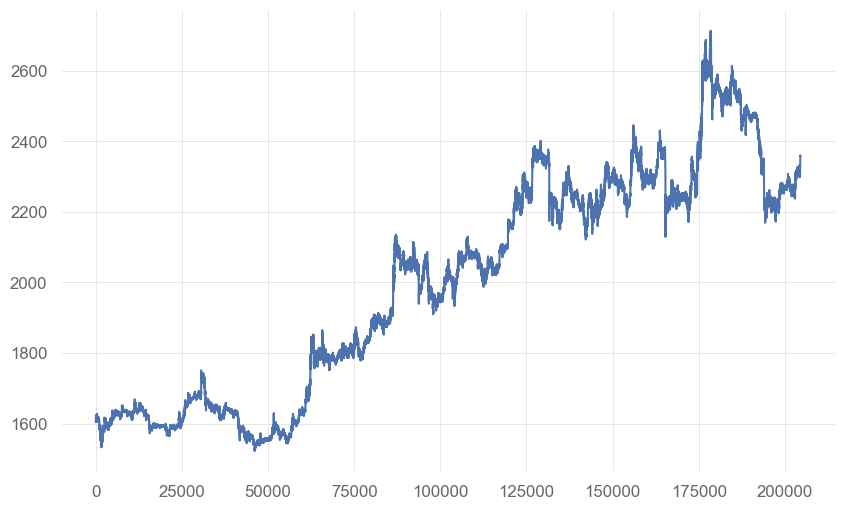

In [29]:
df.Close.plot()

## Volume Run Bar

In [30]:
import mlfinlab
from mlfinlab.datastructures.run import get_volume_run_bars

In [31]:
volume_run_bars = get_volume_run_bars(df[["Epoch", "Open", "Volume"]], exp_num_ticks_init=100000, num_prev_bars=3, num_ticks_ewma_window=3)
volume_run_bars

Reading data in batches:
Batch number: 0
Returning bars 



,date_time,open,high,low,close,cum_vol,cum_dollar,cum_ticks
0,2023-11-19 03:23:00+00:00,1615.29,2135.66,1523.01,1948.67,3.555242e+10,6.362406e+13,100007
1,2023-11-19 03:30:00+00:00,1948.67,1949.37,1945.80,1945.80,4.791054e+06,9.327421e+09,7
2,2023-11-19 03:31:00+00:00,1945.80,1944.20,1944.20,1944.20,3.082884e+06,5.993743e+09,1
3,2023-11-19 03:32:00+00:00,1944.20,1946.08,1944.20,1946.08,1.824899e+05,3.551399e+08,1
4,2023-11-19 03:33:00+00:00,1946.08,1946.33,1946.08,1946.33,2.129892e+05,4.145473e+08,1
...,...,...,...,...,...,...,...,...
104463,2024-01-30 16:32:00+00:00,2360.21,2358.28,2358.28,2358.28,1.057189e+06,2.493147e+09,1
104464,2024-01-30 16:33:00+00:00,2358.28,2359.40,2358.28,2359.40,1.182393e+06,2.789739e+09,1
104465,2024-01-30 16:34:00+00:00,2359.40,2358.37,2358.37,2358.37,7.106553e+05,1.675988e+09,1
104466,2024-01-30 16:35:00+00:00,2358.37,2359.92,2358.37,2359.92,1.544817e+06,3.645644e+09,1


## Dollar Run Bar

In [32]:
import mlfinlab
from mlfinlab.datastructures.run import get_dollar_run_bars

In [33]:
dollar_run_bars = get_dollar_run_bars(df[["Epoch", "Open", "Volume"]], exp_num_ticks_init=100000, num_prev_bars=3, num_ticks_ewma_window=3)
dollar_run_bars

Reading data in batches:
Batch number: 0
Returning bars 



,date_time,open,high,low,close,cum_vol,cum_dollar,cum_ticks
0,2023-11-19 03:23:00+00:00,1615.29,2135.66,1523.01,1948.67,3.555242e+10,6.362406e+13,100007
1,2023-11-19 03:30:00+00:00,1948.67,1949.37,1945.80,1945.80,4.791054e+06,9.327421e+09,7
2,2023-11-19 03:31:00+00:00,1945.80,1944.20,1944.20,1944.20,3.082884e+06,5.993743e+09,1
3,2023-11-19 03:32:00+00:00,1944.20,1946.08,1944.20,1946.08,1.824899e+05,3.551399e+08,1
4,2023-11-19 03:33:00+00:00,1946.08,1946.33,1946.08,1946.33,2.129892e+05,4.145473e+08,1
...,...,...,...,...,...,...,...,...
104463,2024-01-30 16:32:00+00:00,2360.21,2358.28,2358.28,2358.28,1.057189e+06,2.493147e+09,1
104464,2024-01-30 16:33:00+00:00,2358.28,2359.40,2358.28,2359.40,1.182393e+06,2.789739e+09,1
104465,2024-01-30 16:34:00+00:00,2359.40,2358.37,2358.37,2358.37,7.106553e+05,1.675988e+09,1
104466,2024-01-30 16:35:00+00:00,2358.37,2359.92,2358.37,2359.92,1.544817e+06,3.645644e+09,1


<Axes: >

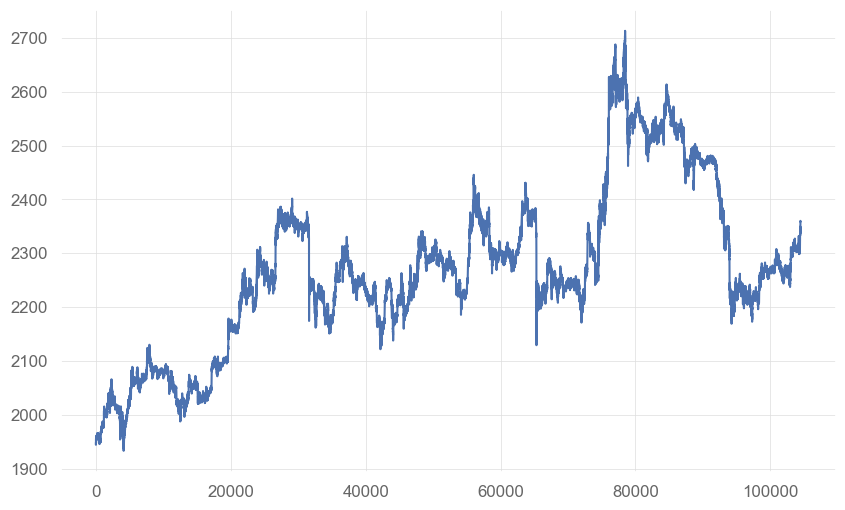

In [34]:
dollar_run_bars.close.plot()

<Axes: >

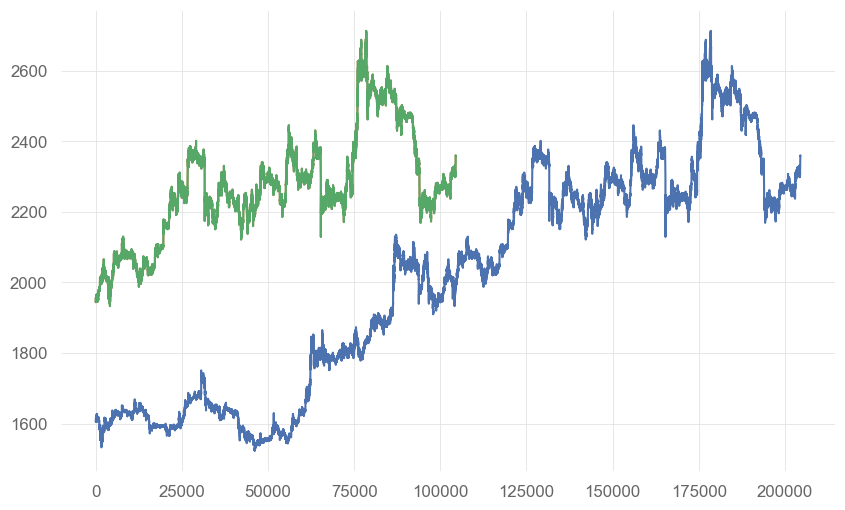

In [35]:
df.Close.plot()
volume_run_bars.close.plot()
dollar_run_bars.close.plot()